# Introduction

In this module you will learn how to prepare your data and features prior to running a machine learning model. This is a very essential step that, if skipped, can cause some grief down the line. It is usually performed right after or alongside Exploratory Data Analysis (EDA).

## Numerical Transformation

For example, some machine learning models, like logistic regression and neural networks, can only handle numbers. Then random forest and decision tree models can take both numbers and text. We will call these text features categorical data, but more on that later. We also need to understand the spread of our data, as some models have a tough time handling data that has extreme outliers.

This process is called numerical transformation, when we take our numerical data and change it into another numerical value. This is meant to change the scale of our values or even adjust the skewness of our data. You may be thinking, “we already have our data in numbers. Why would we want to change those?” Well, first of all, that is a great question. We’ll dive deep into the “why we do this” throughout this lesson. To put it simply, we do this to help our model better compare features and, most importantly, improve our model’s accuracy and interpretability. That sounds like some good reasons to put the time and effort into numerical transformations if I do say so myself.

We’ll focus on the following numerical transformations:

- Centering
- Standard Scaler
- Min and Max Scaler
- Binning
- Log transformations

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
coffee = pd.read_csv('starbucks_customers.csv')

coffee.columns

Index(['spent', 'nearest_starbucks', 'age', 'rate_quality', 'rate_price',
       'rate_promo', 'ambiance', 'wifi', 'service', 'meetings_hangout'],
      dtype='object')

In [3]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   spent              122 non-null    int64
 1   nearest_starbucks  122 non-null    int64
 2   age                122 non-null    int64
 3   rate_quality       122 non-null    int64
 4   rate_price         122 non-null    int64
 5   rate_promo         122 non-null    int64
 6   ambiance           122 non-null    int64
 7   wifi               122 non-null    int64
 8   service            122 non-null    int64
 9   meetings_hangout   122 non-null    int64
dtypes: int64(10)
memory usage: 9.7 KB


# Centering Data

Data centering involves subtracting the mean of a data set from each data point so that the new mean is 0. This process helps us understand how far above or below each of our data points is from the mean.

In [4]:
ages = coffee.age

We will find the mean of our feature, create one line of code to center our data, and then plot the centered data. Here what it will look like in Python.

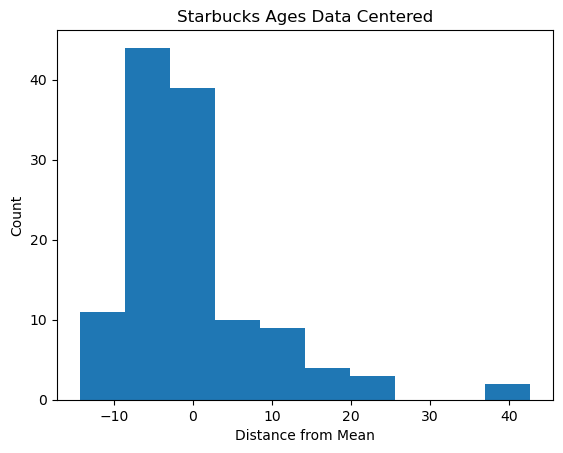

In [7]:
# Get the mean of the feature
mean_age = np.mean(ages)

# Subtract the mean form the ages
centered_ages = ages - mean_age 

#visualize your new list
plt.hist(centered_ages)

#label our visual
plt.title('Starbucks Ages Data Centered')
plt.xlabel('Distance from Mean')
plt.ylabel('Count')
plt.show()

## Standardizing our Data

Excellent work with centering the age feature from our dataset! Now we’ll take that concept one step further and discuss standardizing our data. Standardization (also known as Z-Score normalization) is when we center our data, then divide it by the standard deviation. Once we do that, our entire data set will have a mean of zero and a standard deviation of one. Which is allowing all of our features to be on the same scale. How cool is that?

This step is critical because some machine learning models will treat all features equally regardless of their scale. You’ll definitely want to standardize your data in the following situations:

- Before Principal Component Analysis
- Before using any clustering or distance based algorithm (think KMeans or DBSCAN)
- Before KNN
- Before performing regularization methods like LASSO and Ridge

If I wanted to see how customers rated quality vs. price, I could graph a scatter plot of those two features and easily see that customers tend to score those two questions closely. Notice the darker spots (meaning more data points are laying on top of one another) around the 3.0 for “Rate Quality” and 3.0 for “Rate Price” as an example. This insight was easy to see since our features are on the same one to five scale.

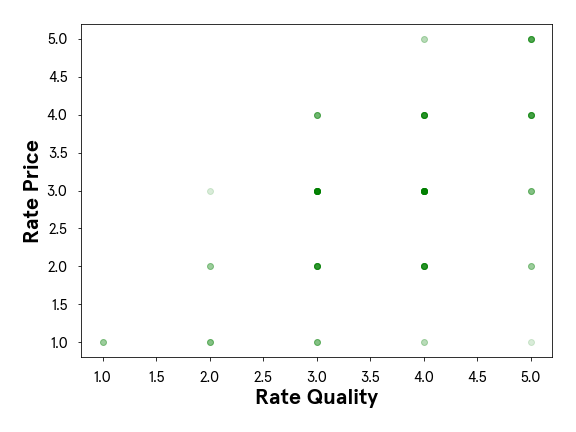

Now, what happens if I am working with features on two totally different scales? Perhaps the “customer age” and “how far they live from a Starbucks” feature? Let’s take a look.

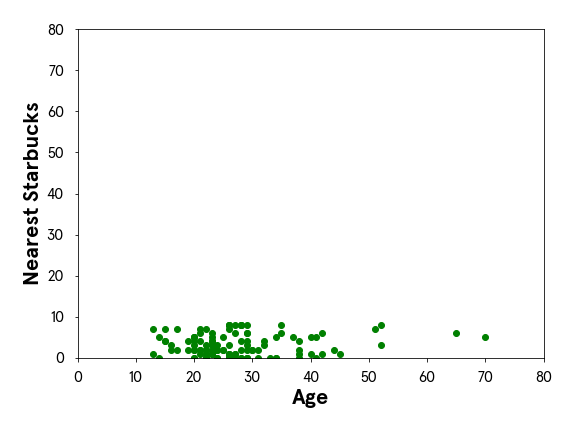


Woah! Looking at this, it is much more challenging to gain insight or even identify patterns within our data. This will be a similar experience for our machine learning models. That’s why when we standardize our entire dataset, we tend to see a more robust model performance if all features are on the same scale.

Let’s examine one feature to learn the mathematics that goes on when we standardize our data. The mathematical formula will look like this:

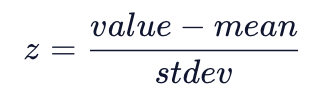

We’ll look at just one feature, where customers were asked how close they are to their nearest Starbucks, and follow that formula above. First, we will set our nearest_starbucks feature to its own variable and then find the mean and standard deviation. Then we can quickly standard our list following the formula above.

In [8]:
distance = coffee['nearest_starbucks']

#find the mean of our feature
distance_mean = np.mean(distance)

#find the standard deviation of our feature
distance_std_dev = np.std(distance)

#this will take each data point in distance subtract the mean, then divide by the standard deviation
distance_standardized = (distance - distance_mean) / distance_std_dev

We now have our distance feature standardized! Let’s double-check by seeing what the mean and standard deviation of our array is.

In [9]:
# print what type distance_standardized is
print(type(distance_standardized))
#output = <class 'pandas.core.series.Series'>

#print the mean
print(np.mean(distance_standardized))
#output = 7.644158530205996e-17

#print the standard deviation
print(np.std(distance_standardized))
#output = 1.0000000000000013

<class 'pandas.core.series.Series'>
-9.755402314739081e-16
1.0000000000000013


Our outputs are basically mean = 0 and standard deviation = 1. Fantastic! Let’s see what our age feature looks like standardized.

## Standardizing our Data with Sklearn

Now that we understand the mathematics behind a standard scaler let’s quickly implement it with the sklearn library. We will begin by importing our StandardScaler library from <code>sklearn.preprocessing</code>.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

We instantiate the StandardScaler by setting it to a variable called scaler which we can then use to transform our feature. The next step is to reshape our distance array. StandardScaler must take in our array as 1 column, so we’ll reshape our distance array using the .reshape(-1,1) method. This numpy method says to take our data and give it back to us as 1 column, represented in the second value. The -1 asks numpy to figure out the exact number of rows to create based on our data. Pretty cool, right?

In [11]:
reshaped_distance = np.array(distance).reshape(-1,1)
distance_scaler = scaler.fit_transform(reshaped_distance)

Just like we learned in the last lesson, we do this so our data has a mean of 0 and standard deviation of 1. Let’s print to see how the StandardScaler did.

In [12]:
print(np.mean(distance_scaler))
#output = -9.464196275493137e-17
print(np.std(distance_scaler))
#output = 0.9999999999999997

-9.464196275493137e-17
0.9999999999999997


***

## Min-Max Normalization

Another form of scaling your data is to use a min-max normalization process. The name says it all, we find the minimum and maximum data point in our entire data set and set each of those to 0 and 1, respectively. Then the rest of the data points will transform to a number between 0 and 1, depending on its distance between the minimum and maximum number. We find that transformed number by taking the data point subtracting it from the minimum point, then dividing by the value of our maximum minus minimum.

Mathematically a min-max normalization looks like this:

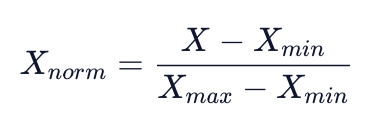

One thing to note about min-max normalization is that this transformation does not work well with data that has extreme outliers. You will want to perform a min-max normalization if the range between your min and max point is not too drastic.

The reason we would want to normalize our data is very similar to why we would want to standardize our data - getting everything on the same scale.

We’d do this process to our entire data set, but lets look at our distance to a nearest Starbucks feature. We already know from earlier in this lesson that our range in this feature is not too large, so it is a good candidate for a min-max normalization. We’ll write a function that will perform the mathematics needed to transform the entire column.

In [14]:
distance = coffee['nearest_starbucks']

#find the min value in our feature
distance_min = np.min(distance)

#find the max value in our feature
distance_max = np.max(distance)

#normalize our feature by following the formula
distance_normalized = (distance - distance_min) / (distance_max - distance_min)

print(distance_normalized)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
117    0.0
118    0.0
119    0.0
120    0.0
121    0.0
Name: nearest_starbucks, Length: 122, dtype: float64


## Min-Max Normalization with Sklearn

Happy to see you now have a strong understanding of how a Min-Max Normalization works, let’s try implementing it with the sklearn library.

We will start by importing our MinMaxScaler library from sklearn.preprocessing. Just like we covered in the StandardScaler exercise, we start by instantiating the MinMaxScaler by setting it to a variable called mmscaler which we can then use to transform our feature.

In [15]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

The next step is to import our distance feature and reshape it so it is ready for our mmscaler.

In [16]:
#get our distance feature
distance = coffee['nearest_starbucks']

#reshape our array to prepare it for the mmscaler
reshaped_distance = np.array(distance).reshape(-1,1)

#.fit_transform our reshaped data
distance_norm = mmscaler.fit_transform(reshaped_distance)

#see unique values
print(set(np.unique(distance_norm)))
#output = {0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0}

{0.0, 0.125, 0.5, 0.25, 0.375, 0.625, 0.75, 0.875, 1.0}


***

## Binning our Data

Binning data is the process of taking numerical or categorical data and breaking it up into groups. We could decide to bin our data to help capture patterns in noisy data. There isn’t a clean and fast rule about how to bin your data, but like so many things in machine learning, you need to be aware of the trade-offs.

You want to make sure that your bin ranges aren’t so small that your model is still seeing it as noisy data. Then you also want to make sure that the bin ranges are not so large that your model is unable to pick up on any pattern. It is a delicate decision to make and will depend on the data you are working with.

Going back to our customer data and looking at our distance feature, let’s look at the data with a histogram.

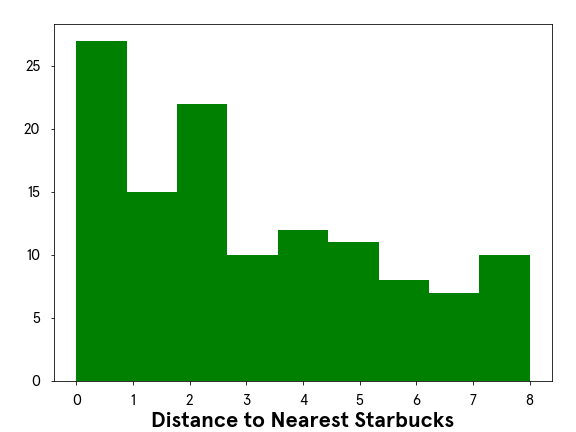

We can easily see that a lot of customers who completed this survey live fairly close to a Starbucks, and our data has a range of 0 km to 8km. I wonder how our data would transform if we were to bin our data in the following way:

- distance < 1km
- 1.1km <= distance < 3km
- 3.1km <= distance < 5km
- 5.1km <= distance

First, we’ll set the upper boundaries of what we listed above.


In [1]:
bins = [0, 1, 3, 5, 8.1]

Now you may be asking yourself ‘Why end at 8.1? Isn’t our max value 8?’ That is true! We have 8.1 and not 8 because the pandas function we will use <code>pd.cut()</code> has a parameter where it will include the lower bound, and excludes the upper bound. Let me show you what I mean.

In [5]:
coffee['binned_distance'] = pd.cut(coffee['nearest_starbucks'], bins, right = False)
 
print(coffee[['binned_distance', 'nearest_starbucks']].head(3))
 
#output
#  binned_distance  nearest_starbucks
#0      [5.0, 8.1)                  8
#1      [5.0, 8.1)                  8
#2      [5.0, 8.1)                  8

  binned_distance  nearest_starbucks
0      [5.0, 8.1)                  8
1      [5.0, 8.1)                  8
2      [5.0, 8.1)                  8


We can see that those who marked 8 km now live in the [5.0, 8.1) bucket. The bracket [ tells us 5.0 is included, and the parenthesis ) tells us that 8.1 is excluded. We could write it as an inequality statement like this: 5 <= distance < 8.1 this allows our customers who marked 8 to belong to the ‘Lives greater than 5.1 km’ bin. Now let’s have a look at our newly binned data.

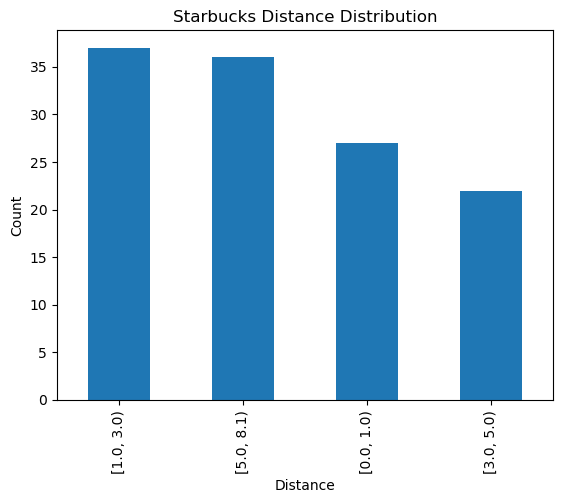

In [6]:
# Plot the bar graph of binned distances
coffee['binned_distance'].value_counts().plot(kind='bar')
 
# Label the bar graph 
plt.title('Starbucks Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count') 
 
# Show the bar graph 
plt.show()


***

## Natural Log Transformation

We’ve covered plenty of transformations! We have one last transformation we need to cover, and that is log transformations. Logarithms are an essential tool in statistical analysis and machine learning preparation. This transformation works well for right-skewed data and data with large outliers. After we log transform our data, one large benefit is that it will allow the data to be closer to a “normal” distribution. It also changes the scale so our data points will drastically reduce the range of their values.

For example, let’s explore a whole new data set from Kaggle around used car prices. Take a look at this histogram plot of 100,000 used car odometers.

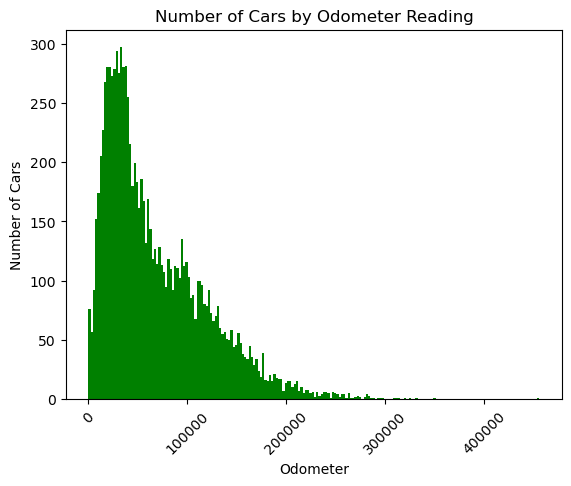

In [7]:
#import our dataframe
cars = pd.read_csv('cars.csv')
 
#set our variable
odometer = cars['odometer']
 
#graph our odometer readings
plt.hist(odometer, bins = 200, color = 'g')
 
#add labels
plt.xticks(rotation = 45)
plt.title('Number of Cars by Odometer Reading')
plt.ylabel('Number of Cars')
plt.xlabel('Odometer')
plt.show()

This histogram is right-skewed, where the majority of our data is located on the left side of our graph. If we were to provide this feature to our machine learning model it will see a lot of different cars with odometer readings off on the left of our graph. It will not see a lot of examples with very high odometer readings. This may cause issues with our model, as it may struggle to pick up on patterns that are within those examples off on the right side of our histogram.

We’ll perform a log transformation using numpy to see how our data will transform.

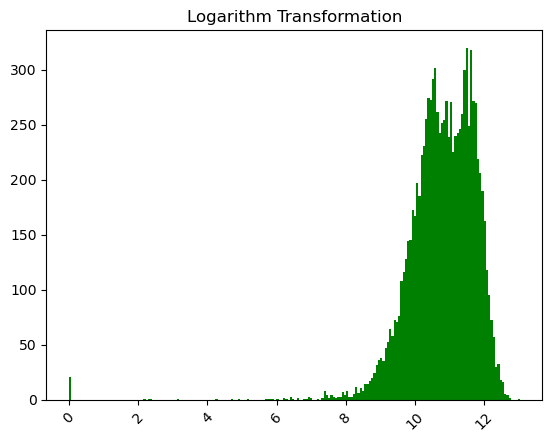

In [9]:
#perform the log transformation
log_car = np.log(cars['odometer'])

cars['odometer_log'] = log_car
 
#graph our transformation
plt.hist(log_car, bins = 200, color = 'g')
 
#rotate the x labels so we can read it easily
plt.xticks(rotation = 45)
 
#provide a title
plt.title('Logarithm Transformation')
plt.show()

Our data looks much closer to a normal distribution! If we were to look at a sample of five different cars with varying odometer readings, let’s examine how the log transformation changed their values.

In [12]:
cars.head()

,Unnamed: 0,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16,odometer_log
0,449069,2006,Chrysler,300,Base,Sedan,automatic,2c3ka43r76h366165,il,1.9,119618.0,blue,gray,go financial,4775,2500,Thu May 28 2015 03:00:00 GMT-0700 (PDT),NaN,11.692059
1,197199,2014,Volkswagen,Jetta,S,Sedan,manual,3vw1k7aj9em275429,ca,4.9,7740.0,—,black,volkswagen credit inc/sc,12050,12750,Wed Jul 01 2015 09:30:00 GMT-0700 (PDT),NaN,8.954157
2,288171,2007,Dodge,Durango,SLT,SUV,automatic,1d8hd48p97f510727,fl,1.9,166628.0,gold,tan,mid atlantic finance/clearwater,2850,2700,Wed Feb 11 2015 08:00:00 GMT-0800 (PST),NaN,12.023519
3,277025,2013,Mercedes-Benz,E-Class,E350 Sport,Sedan,automatic,wddhf5kb3da735753,tx,3.8,23923.0,white,off-white,mercedes-benz financial services,32200,32000,Thu Feb 12 2015 03:00:00 GMT-0800 (PST),NaN,10.082596
4,322760,2013,Ford,Explorer,XLT,SUV,automatic,1fm5k8d84dgc59887,mi,5.0,18494.0,red,black,"ford motor credit company,llc",29100,28100,Thu Jun 11 2015 02:30:00 GMT-0700 (PDT),NaN,9.825202


If we compare the Altima with 10,126 miles to the Saturn with 151,687 miles those two cars have a huge difference in odometer readings. Yet, once we log transform the data we see the range from 9.22 to 11.93 is much smaller. Compressing the range of our data can help our model perform better!

There is so much more to add about log transformation. For the purpose of this exercise we just want to give a high overview and demonstrate how to log transform your data. Before we have you start testing your new skills let’s quickly cover two major topics with log transformation:

1. Using a log transformation in a machine learning model will require some extra interpretation. For example, if you were to log transform your data in a linear regression model, our independent variable has a multiplication relationship with our dependent variable instead of the usual additive relationship we would have if our data was not log-transformed.
2. Keep in mind, just because your data is skewed does not mean that a log transformation is the best answer. You would not want to log transform your feature if:

    2.1 You have values less than 0. The natural logarithm (which is what we’ve been talking about) of a negative number is undefined.

    2.2 You have left-skewed data. That data may call for a square or cube transformation.
    
    2.3 You have non-parametric data


***



https://www.codecademy.com/paths/machine-learning-engineer/tracks/mle-machine-learning-fundamentals/modules/mlecp-feature-engineering-i-data-transformations/articles/fe-encoding-categorical-variables